In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Give dataset path
train_path = '/content/drive/My Drive/Colab Notebooks/Agricultural crops image classification using CNN/Agricultural-crops'

Working with 21 images
Image examples: 
image (12).jpg


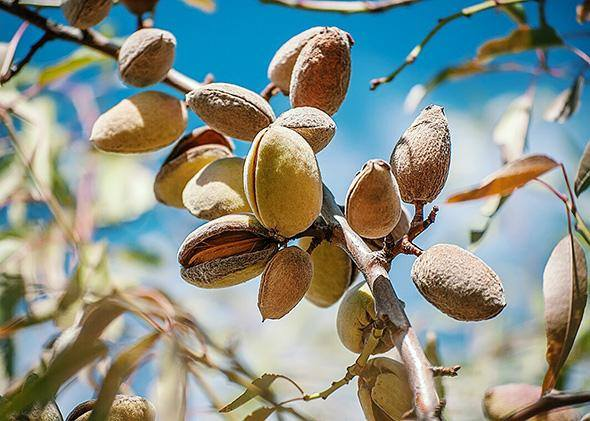

image (9).jpg


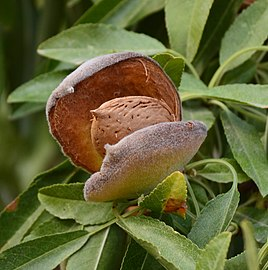

image (6).jpg


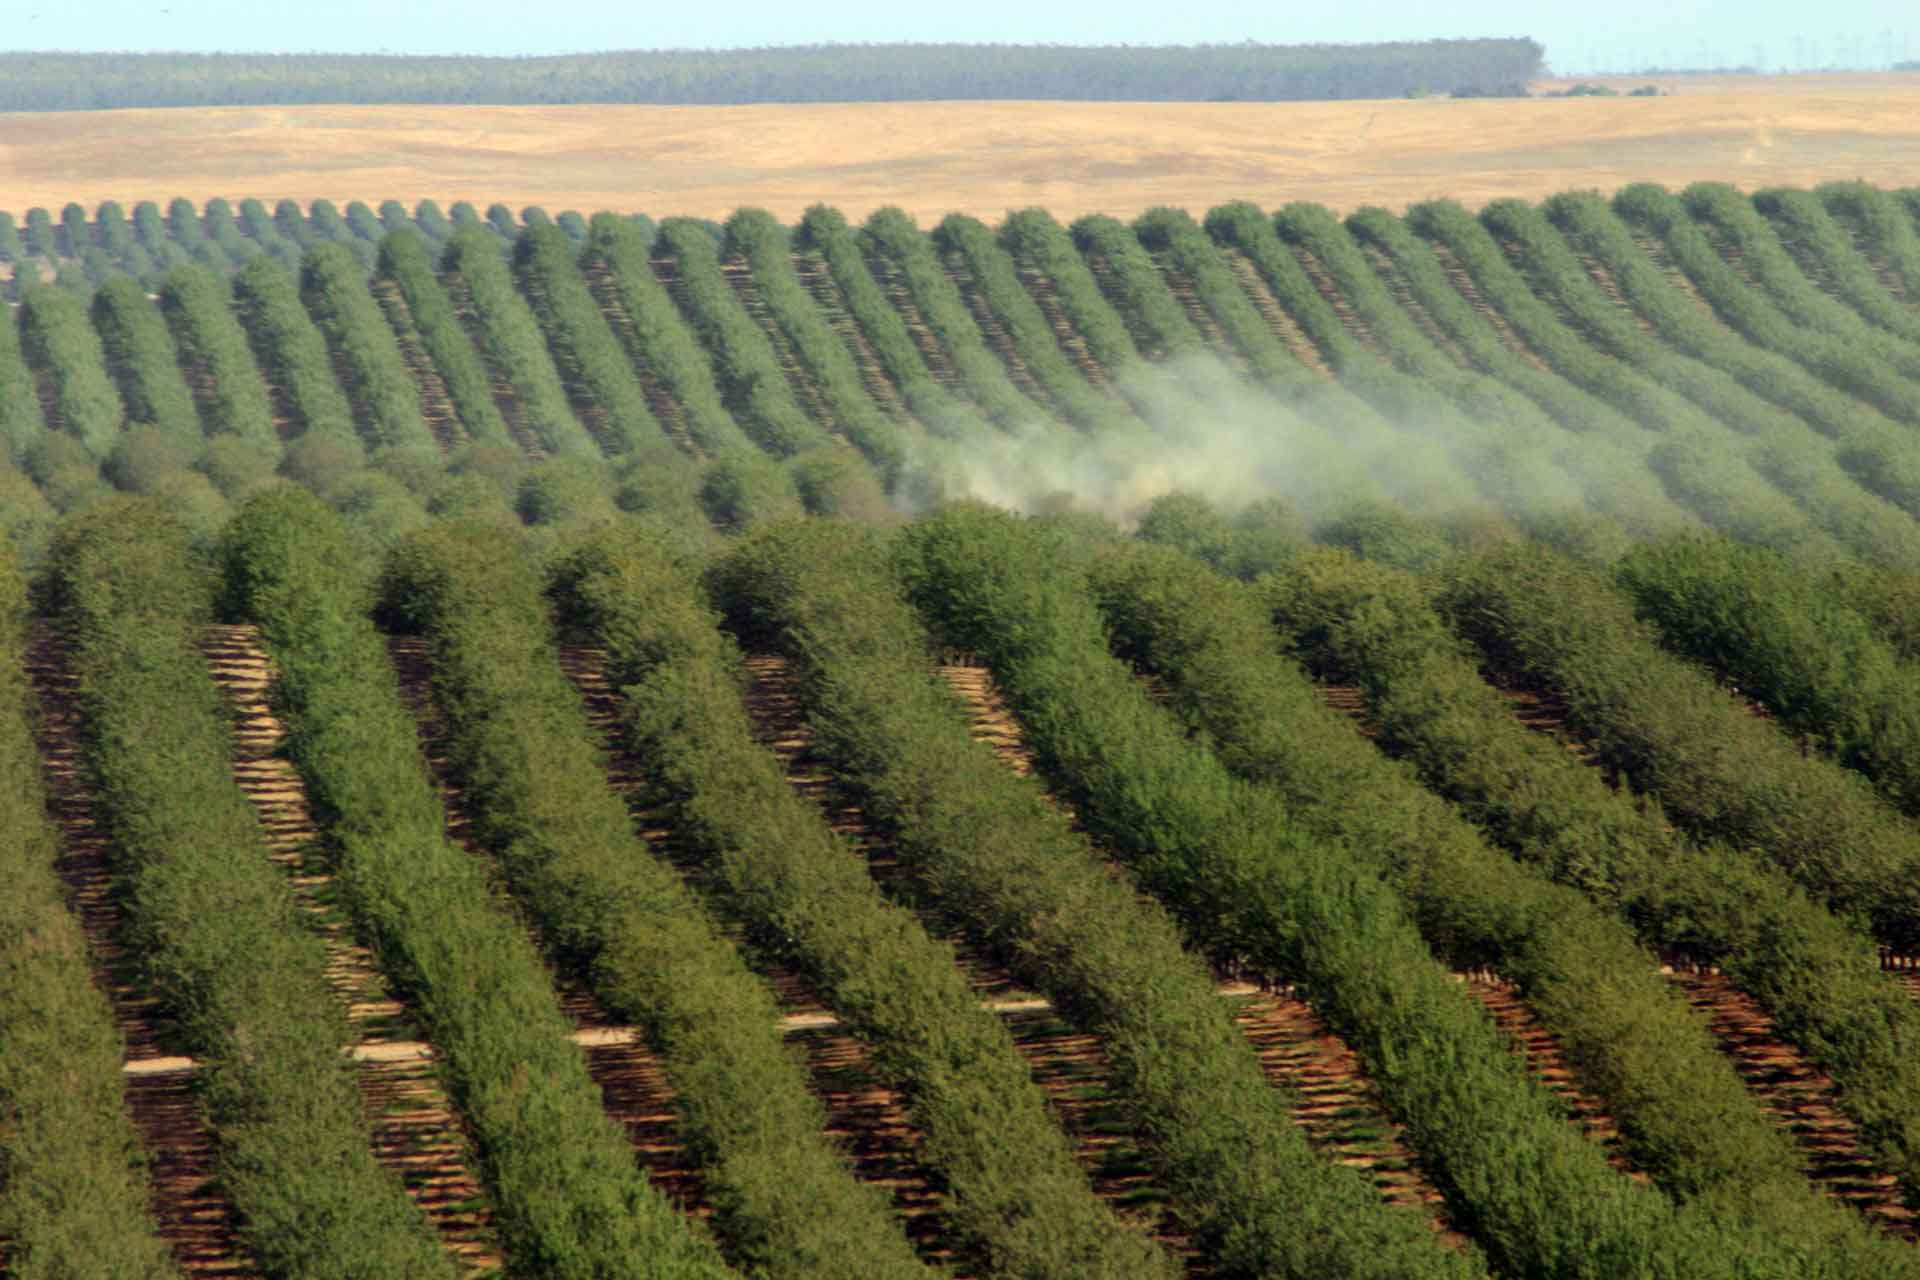

image (3).jpg


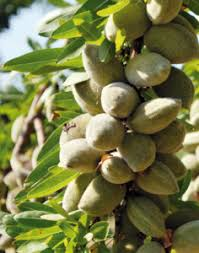

image (5).jpg


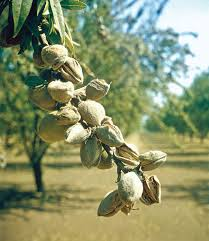

image (3).png


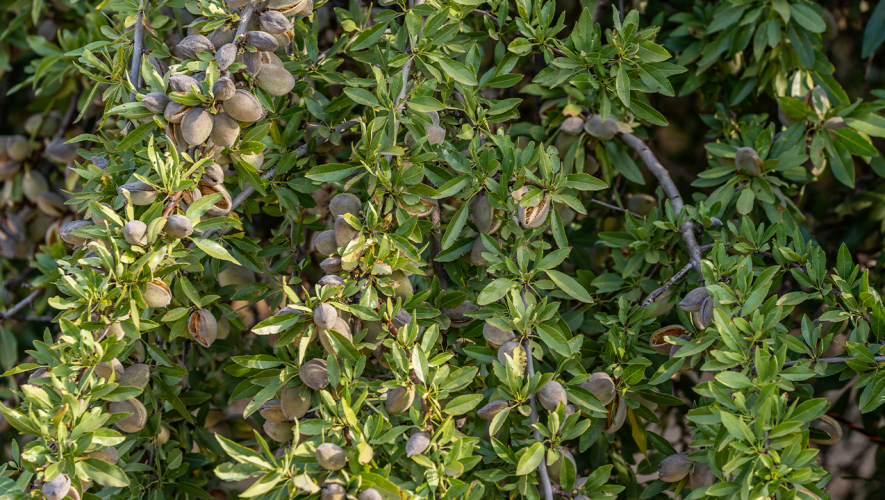

image (11).jpg


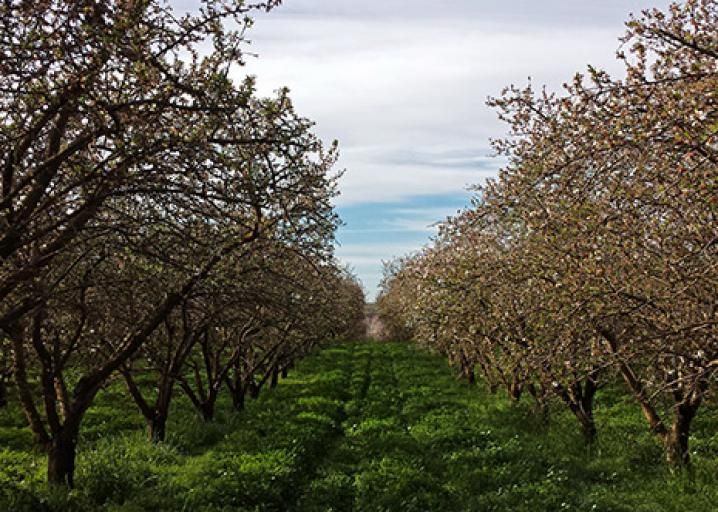

image (4).jpg


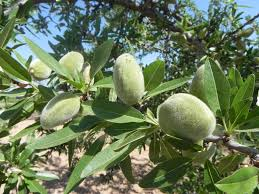

image (15).jpg


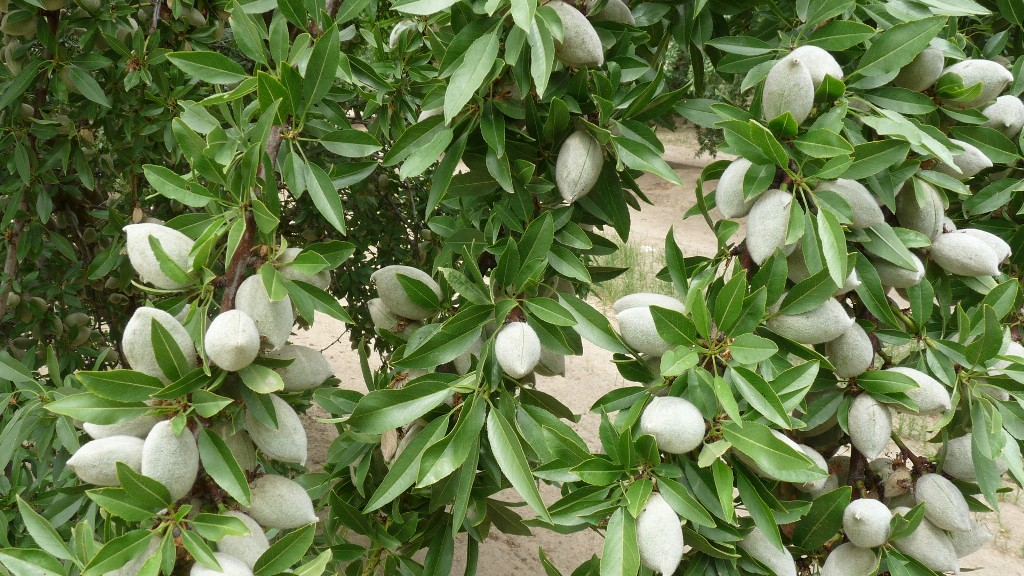

image (13).jpg


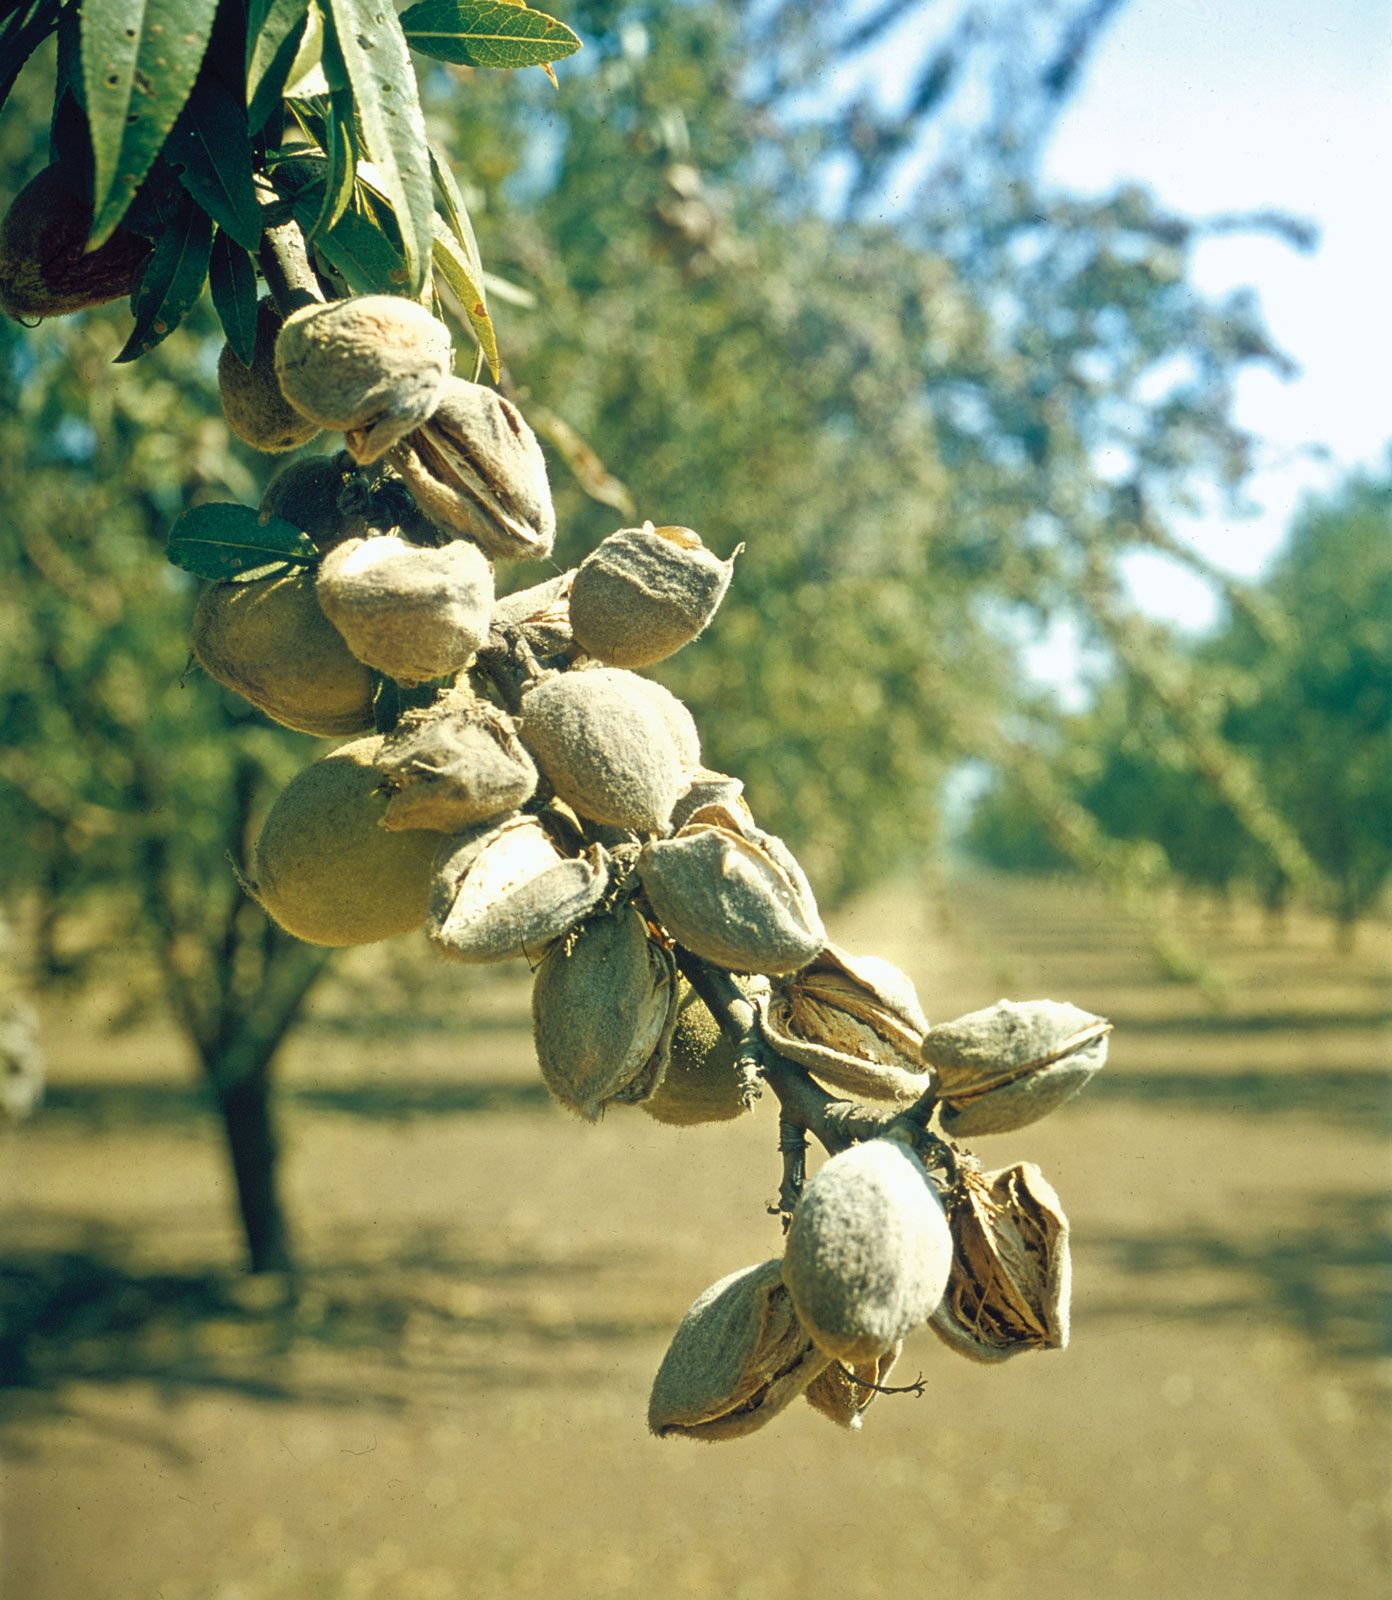

In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object 
folder = train_path+'/almond'
onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")
for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_4')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/My Drive/Colab Notebooks/Agricultural crops image classification using CNN/Agricultural-crops/*')
print(len(folders))

30


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from keras import optimizers
adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='training')

Found 595 images belonging to 30 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(train_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            subset='validation')

Found 234 images belonging to 30 classes.


In [ ]:
model_train = model.fit(train_set, epochs=50, verbose=1, 
                        validation_data=test_set)

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='mymodel.h5', verbose=1, save_best_only=True)
callbacks = [checkpoint]
start = datetime.now()
model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=5,
  validation_steps=32,
  callbacks=callbacks ,verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 9.7543 - accuracy: 0.6625


Epoch 1: val_loss improved from inf to 19.66403, saving model to mymodel.h5
5/5 [==============================] - 9s 2s/step - loss: 9.7543 - accuracy: 0.6625 - val_loss: 19.6640 - val_accuracy: 0.3718
Epoch 2/20
5/5 [==============================] - ETA: 0s - loss: 9.7306 - accuracy: 0.6438

5/5 [==============================] - 3s 655ms/step - loss: 9.7306 - accuracy: 0.6438
Epoch 3/20
5/5 [==============================] - ETA: 0s - loss: 8.7582 - accuracy: 0.6125

5/5 [==============================] - 3s 571ms/step - loss: 8.7582 - accuracy: 0.6125
Epoch 4/20
5/5 [==============================] - ETA: 0s - loss: 8.2012 - accuracy: 0.7000

5/5 [==============================] - 3s 583ms/step - loss: 8.2012 - accuracy: 0.7000
Epoch 5/20
5/5 [==============================] - ETA: 0s - loss: 6.5034 - accuracy: 0.7415

5/5 [==============================] - 3s 529ms/step - loss: 6.5034 - accuracy: 0.7415
Epoch 6/20
5/5 [==============================] - ETA: 0s - loss: 6.8490 - accuracy: 0.6735

5/5 [==============================] - 3s 496ms/step - loss: 6.8490 - accuracy: 0.6735
Epoch 7/20
5/5 [==============================] - ETA: 0s - loss: 4.9354 - accuracy: 0.7483

5/5 [==============================] - 3s 549ms/step - loss: 4.9354 - accuracy: 0.7483
Epoch 8/20
5/5 [==============================] - ETA: 0s - loss: 7.1820 - accuracy: 0.7143

5/5 [==============================] - 3s 556ms/step - loss: 7.1820 - accuracy: 0.7143
Epoch 9/20
5/5 [==============================] - ETA: 0s - loss: 6.6564 - accuracy: 0.7125

5/5 [==============================] - 3s 552ms/step - loss: 6.6564 - accuracy: 0.7125
Epoch 10/20
5/5 [==============================] - ETA: 0s - loss: 5.4725 - accuracy: 0.7437

5/5 [==============================] - 3s 599ms/step - loss: 5.4725 - accuracy: 0.7437
Epoch 11/20
5/5 [==============================] - ETA: 0s - loss: 5.5514 - accuracy: 0.7250

5/5 [==============================] - 3s 608ms/step - loss: 5.5514 - accuracy: 0.7250
Epoch 12/20
5/5 [==============================] - ETA: 0s - loss: 9.3671 - accuracy: 0.6938

5/5 [==============================] - 3s 607ms/step - loss: 9.3671 - accuracy: 0.6938
Epoch 13/20
5/5 [==============================] - ETA: 0s - loss: 6.1499 - accuracy: 0.7500

5/5 [==============================] - 4s 830ms/step - loss: 6.1499 - accuracy: 0.7500
Epoch 14/20
5/5 [==============================] - ETA: 0s - loss: 5.2565 - accuracy: 0.7500

5/5 [==============================] - 4s 776ms/step - loss: 5.2565 - accuracy: 0.7500
Epoch 15/20
5/5 [==============================] - ETA: 0s - loss: 7.6406 - accuracy: 0.7437

5/5 [==============================] - 3s 579ms/step - loss: 7.6406 - accuracy: 0.7437
Epoch 16/20
5/5 [==============================] - ETA: 0s - loss: 4.5304 - accuracy: 0.7563

5/5 [==============================] - 5s 1s/step - loss: 4.5304 - accuracy: 0.7563
Epoch 17/20
5/5 [==============================] - ETA: 0s - loss: 5.5721 - accuracy: 0.7500

5/5 [==============================] - 3s 606ms/step - loss: 5.5721 - accuracy: 0.7500
Epoch 18/20
5/5 [==============================] - ETA: 0s - loss: 3.8705 - accuracy: 0.7823

5/5 [==============================] - 3s 599ms/step - loss: 3.8705 - accuracy: 0.7823
Epoch 19/20
5/5 [==============================] - ETA: 0s - loss: 4.9941 - accuracy: 0.7812

5/5 [==============================] - 3s 604ms/step - loss: 4.9941 - accuracy: 0.7812
Epoch 20/20
5/5 [==============================] - ETA: 0s - loss: 4.0328 - accuracy: 0.7875

5/5 [==============================] - 3s 601ms/step - loss: 4.0328 - accuracy: 0.7875


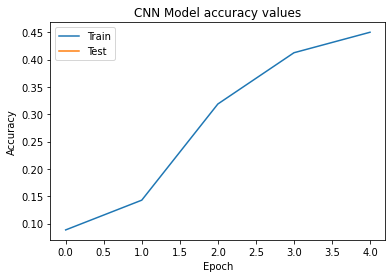

In [ ]:
# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
